In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# --- 1. Data Loading and Initial Preprocessing ---
print("--- 1. Data Loading and Initial Preprocessing ---")

--- 1. Data Loading and Initial Preprocessing ---


In [3]:
# Load the dataset
try:
    df = pd.read_csv('./Employee_Performance_DataSet.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The CSV file was not found at './Employee_Performance_DataSet.csv'")
    # Create an empty DataFrame structure for demonstration if file fails to load
    df = pd.DataFrame()

Dataset loaded successfully.


In [4]:
# Drop the unique identifier column
if not df.empty:
    df = df.drop('EmpNumber', axis=1)

In [5]:
# Separate features (X) and target (y)
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

In [6]:
# --- 2. Feature Engineering and Scaling ---

# Identify categorical columns for One-Hot Encoding
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"Features encoded. Total features after encoding: {X.shape[1]}")

Features encoded. Total features after encoding: 53


In [7]:
# Split the data into training and testing sets
# Using stratify=y to ensure the class distribution in y is maintained in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Apply standard scaling to numerical features (critical for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Numerical features standardized.")

Numerical features standardized.


In [9]:
# --- 3. Model Training and Prediction ---
print("\n--- 3. Model Training and Prediction ---")


--- 3. Model Training and Prediction ---


In [10]:
# Define the models. Note: SVM requires scaled data.
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine (SVM)": SVC(random_state=42)
}

In [11]:
results = {}
reports = {}

for name, model in models.items():
    # Use scaled data for SVM, and unscaled (or scaled) for tree-based models
    if name == "Support Vector Machine (SVM)":
        X_train_data = X_train_scaled
        X_test_data = X_test_scaled
    else:
        # Tree-based models are generally scale-invariant, but we'll use unscaled for this demo
        X_train_data = X_train
        X_test_data = X_test
        
    print(f"\nTraining {name}...")
    model.fit(X_train_data, y_train)


Training Random Forest...

Training Gradient Boosting...

Training Support Vector Machine (SVM)...


In [12]:
# Predict on the test set
y_pred = model.predict(X_test_data)

In [13]:
# --- 4. Model Evaluation and Performance Metrics ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)

In [14]:
# Store results
results[name] = accuracy
reports[name] = report

In [15]:
# Print detailed report
print(f"\n--- {name} Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


--- Support Vector Machine (SVM) Evaluation ---
Accuracy: 0.7778

Classification Report:
              precision    recall  f1-score   support

           2     0.9333    0.2414    0.3836        58
           3     0.7676    0.9962    0.8671       262
           4     1.0000    0.1250    0.2222        40

    accuracy                         0.7778       360
   macro avg     0.9003    0.4542    0.4910       360
weighted avg     0.8202    0.7778    0.7176       360



In [16]:
# Visualization of Confusion Matrix for each model
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Confusion Matrix for {name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
plt.close() # Close plot to avoid showing it inline
print(f"Confusion Matrix visualization saved for {name}.")

Confusion Matrix visualization saved for Support Vector Machine (SVM).


In [17]:
# --- 5. Comparison Visualization ---
print("\n--- 5. Comparison Visualization (Accuracy Score) ---")


--- 5. Comparison Visualization (Accuracy Score) ---


In [18]:
# Create a DataFrame for comparison
performance_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

Final model comparison visualization saved as 'model_comparison_accuracy_final.png'


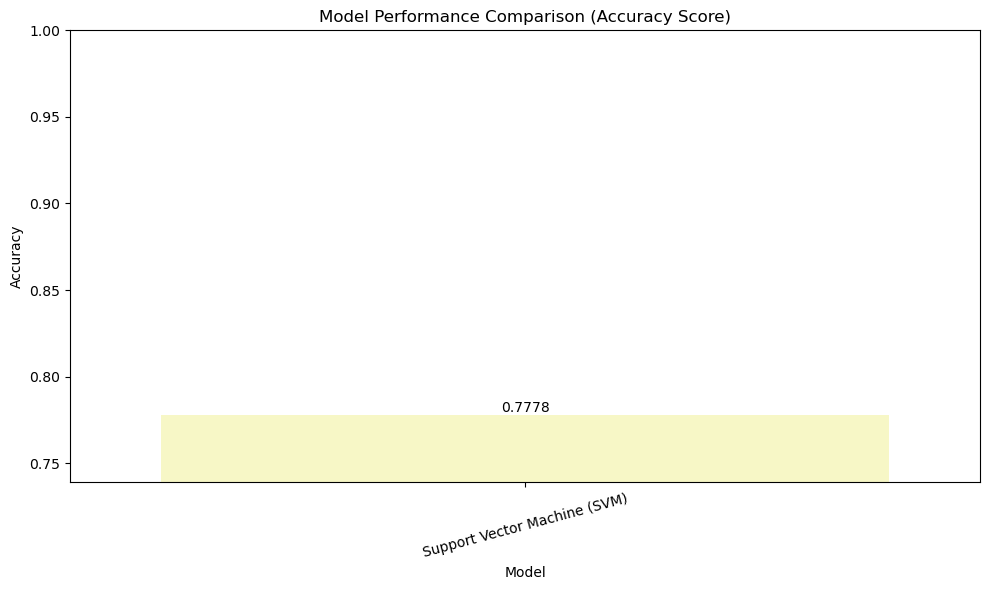

In [19]:
# Generate the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='Spectral')
plt.title('Model Performance Comparison (Accuracy Score)')
plt.ylabel('Accuracy')
plt.ylim(min(performance_df['Accuracy']) * 0.95, 1.0)
for index, row in performance_df.iterrows():
    plt.text(row.name, row.Accuracy, f'{row.Accuracy:.4f}', color='black', ha="center", va="bottom")

plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('model_comparison_accuracy_final.png')
print("Final model comparison visualization saved as 'model_comparison_accuracy_final.png'")